In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

import matplotlib.font_manager as fm
from matplotlib.ticker import MultipleLocator, IndexLocator, FuncFormatter
from matplotlib.dates import MonthLocator, DateFormatter

from matplotlib import font_manager, rcParams
!apt-get install fonts-nanum*
rcParams['font.family'] = 'NanumGothicCoding'
rcParams['axes.unicode_minus'] = False
font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from datetime import datetime
import datetime

In [ ]:
import folium
import json
geojson = json.load( open('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/seoulsigungu.geojson') )

In [ ]:
mpl.rc('font', family='NanumGothicCoding')

# 3. 서울시 아파트가격과 혼인율, 가구구성, 출산율 비교

In [ ]:
house_avg_price_deal = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/평균매매가격/12.01~21.11 평균매매가격_연립다세대.xlsx', index_col=0)
house_avg_price_charter = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/평균매매가격/12.01~21.11 평균전세가격_연립다세대.xlsx', index_col=0)
house_avg_price_rent = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/평균매매가격/12.01~21.11 평균월세가격_연립다세대.xlsx', index_col=0)

apt_avg_price_deal = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/apt/12.01~21.11 평균매매가격_아파트.xlsx',index_col=0)
apt_avg_price_charter = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/apt/12.01~21.11 평균전세가격_아파트.xlsx',index_col=0)
apt_avg_price_rent = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/apt/12.01~21.11 평균월세가격_아파트.xlsx',index_col=0)

month_birth = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/발표 자료 데이터/raw데이터/시군구_성_월별_출생_20220123203016.xlsx',index_col=0)

In [ ]:
birth_level_sum = pd.read_csv('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김장현/전처리/가격_가격지수_출생률 합본.csv')

In [ ]:
birth_level_sum

In [ ]:
birth_level_sum['날짜'] = birth_level_sum['날짜'].str.replace("-","")
birth_level_sum['날짜'].astype(dtype='int64')

## 출생률과 매매, 전세가격 비교

In [ ]:
from matplotlib.ticker import MaxNLocator

In [ ]:
house_avg_price_deal = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/평균매매가격/12.01~21.11 평균매매가격_연립다세대.xlsx', index_col=0)
house_avg_price_charter = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/평균매매가격/12.01~21.11 평균전세가격_연립다세대.xlsx', index_col=0)
house_avg_price_rent = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/평균매매가격/12.01~21.11 평균월세가격_연립다세대.xlsx', index_col=0)

apt_avg_price_deal = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/apt/12.01~21.11 평균매매가격_아파트.xlsx',index_col=0)
apt_avg_price_charter = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/apt/12.01~21.11 평균전세가격_아파트.xlsx',index_col=0)
apt_avg_price_rent = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/apt/12.01~21.11 평균월세가격_아파트.xlsx',index_col=0)

one_household = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/발표 자료 데이터/raw데이터/1인가구비율_시도_시_군_구__20220123182523.xlsx', index_col=0)
marriage=pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/Data/혼인율, 출산율/조혼인율_시도_시_군_구__20220119142731.xlsx', index_col=0)
birth=pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/발표 자료 데이터/raw데이터/시군구_합계출산율__모의_연령별_출산율_20220123190610.xlsx', index_col=0)
jika = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/발표 자료 데이터/raw데이터/지가지수_연도별.xlsx', index_col=0)

month_birth = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/발표 자료 데이터/raw데이터/시군구_성_월별_출생_20220123203016.xlsx',index_col=0)
month_marrigage = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/발표 자료 데이터/raw데이터/시도_시군구_월별_혼인_20220123224724.xlsx',index_col=0)

###출생률과 계절별로 사람들이 선호하는 계절이 존재하기 때문에 월별 데이터 대신 연간 데이터를 사용하기로 결정

In [ ]:
month_birth.index = month_birth.index.str.replace(".","-")
month_birth.index = month_birth.index.str.replace(" ","")
month_birth.index = pd.to_datetime(month_birth.index)
month_birth.index = pd.to_datetime(month_birth.index, format='%Y-%m')


month_marrigage.index = month_marrigage.index.str.replace(".","-")
month_marrigage.index = month_marrigage.index.str.replace(" ","")
month_marrigage.index = pd.to_datetime(month_marrigage.index)
month_marrigage.index = pd.to_datetime(month_marrigage.index, format='%Y-%m')


In [ ]:
month_birth

,전국,서울특별시,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,노원구,은평구,서대문구,마포구,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
시점,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-01,44984,8758,88,125,225,273,290,262,345,414,268,291,526,388,218,392,346,520,448,182,356,367,443,416,476,664,435
2012-02-01,40609,7837,88,95,210,244,278,247,313,363,205,249,413,393,201,274,335,478,393,173,371,343,392,392,432,581,374
2012-03-01,43209,8364,95,109,206,247,290,279,293,365,262,274,440,417,230,329,353,521,463,177,382,319,428,382,448,619,436
2012-04-01,40094,7700,77,105,208,226,258,252,322,342,242,267,429,373,190,324,301,483,436,163,350,312,395,352,387,549,357
2012-05-01,39388,7629,87,87,202,223,266,254,321,384,233,253,435,377,187,295,338,469,367,176,321,327,363,377,394,552,341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,22402,3897,48,58,87,147,140,141,144,170,79,92,180,175,131,183,167,284,171,102,191,148,177,167,179,304,232
2020-09-01,23499,4108,50,57,110,181,128,157,151,162,76,108,179,194,139,174,175,265,194,104,212,204,156,194,181,316,241
2020-10-01,21884,3870,45,61,91,155,115,132,176,199,67,92,187,164,109,166,156,245,209,92,201,153,155,187,193,313,207


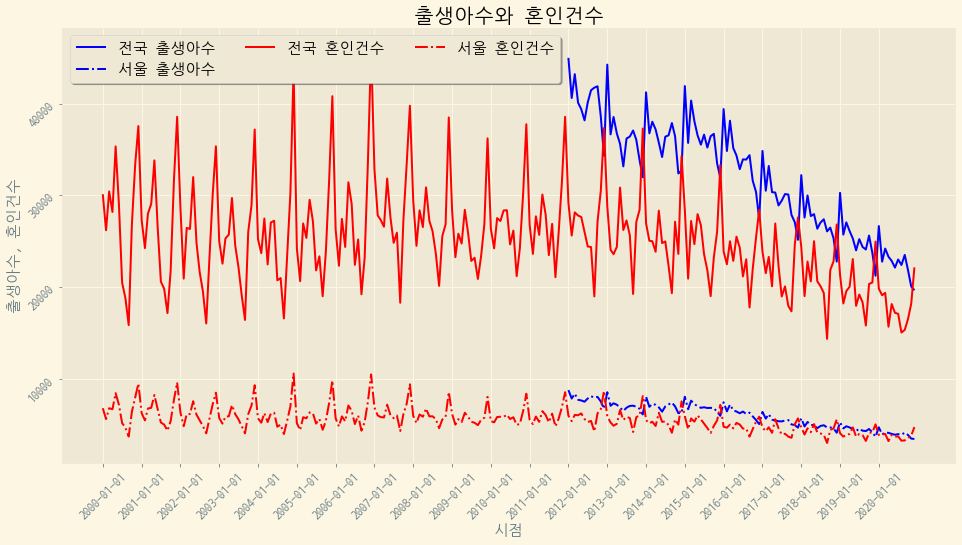

In [ ]:
fig = plt.figure(figsize=(16,8))
plt.title('출생아수와 혼인건수', fontsize=20) 

plt.plot(month_birth['전국'], 'b-', label='전국 출생아수')
plt.plot(month_birth['서울특별시'], 'b-.', label='서울 출생아수')
plt.plot(month_marrigage['전국'], 'r-', label='전국 혼인건수')
plt.plot(month_marrigage['서울특별시'], 'r-.', label='서울 혼인건수')

plt.legend(loc='best', ncol=3, fontsize=15,  frameon=True, shadow=True)

plt.xlabel('시점', fontsize=15)
plt.ylabel('출생아수, 혼인건수', fontsize=15)   
plt.xticks(ticks=month_marrigage.index, rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=12)
plt.locator_params(axis='x', nbins=len(month_marrigage.index)/12)
plt.grid(True)

plt.show()

#수정부분 : 그래프 통일시키기

### 연도별 주택가격지수와 출생률, 혼인률, 1인가구 비율 비교

In [ ]:
apt_avg_total = apt_avg_price_deal['2012-12']
apt_avg_total = apt_avg_total.append(apt_avg_price_deal['2013-12'])
apt_avg_total = apt_avg_total.append(apt_avg_price_deal['2014-12'])
apt_avg_total = apt_avg_total.append(apt_avg_price_deal['2015-12'])
apt_avg_total = apt_avg_total.append(apt_avg_price_deal['2016-12'])
apt_avg_total = apt_avg_total.append(apt_avg_price_deal['2017-12'])
apt_avg_total = apt_avg_total.append(apt_avg_price_deal['2018-12'])
apt_avg_total = apt_avg_total.append(apt_avg_price_deal['2019-12'])
apt_avg_total = apt_avg_total.append(apt_avg_price_deal['2020-12'])
apt_avg_total = apt_avg_total.append(apt_avg_price_deal['2021-11'])

apt_avg_total['년도'] = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
apt_avg_total = apt_avg_total.set_index(keys='년도',drop=True)
apt_avg_total = apt_avg_total.drop(labels=['강북지역','강남지역','도심권','서북권','서남권','동남권','동북권'], axis=1)
apt_avg_total.index = apt_avg_total.index.astype(dtype='int64')

In [ ]:
apt_avg_total.columns

Index(['전국', '서울특별시', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'],
      dtype='object')

In [ ]:
jika = jika.swapaxes(axis1=0,axis2=1)
jika.index = jika.index.str.replace("년","")
jika.index = jika.index.astype(dtype='int64')
jika.head(2)

지 역,서울
2000,46.514
2001,47.399


In [ ]:
marriage.head(2)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
행정구역별,,,,,,,,,,,,,,,,,,,,,
전국,7.0,6.7,6.3,6.3,6.4,6.5,6.8,7.0,6.6,6.2,6.5,6.6,6.5,6.4,6.0,5.9,5.5,5.2,5.0,4.7,4.2
서울특별시,7.7,7.5,7.1,7.1,7.0,7.0,7.3,7.5,7.0,6.7,6.9,7.1,7.1,6.9,6.5,6.5,5.9,5.5,5.4,5.0,4.7


In [ ]:
marriage = marriage.swapaxes(axis1=0,axis2=1)
marriage.index = marriage.index.astype(dtype='int64')
marriage.head(2)

행정구역별,전국,서울특별시,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,노원구,은평구,서대문구,마포구,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2000,7.0,7.7,8.3,8.4,8.6,7.8,8.4,7.4,7.0,7.1,7.2,7.0,7.4,7.5,8.0,8.9,6.1,7.8,8.3,7.4,7.8,8.3,9.1,7.7,7.2,7.4,7.0
2001,6.7,7.5,7.7,8.4,7.6,8.7,8.2,6.9,7.2,7.1,6.9,6.4,7.0,7.4,7.7,8.5,6.3,7.4,8.0,7.1,8.5,8.4,9.1,7.6,7.2,7.4,6.6


In [ ]:
birth = birth.swapaxes(axis1=0,axis2=1)
birth.index = birth.index.astype(dtype='int64')
birth.head(2)

시군구별,전국,서울특별시,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,노원구,은평구,서대문구,마포구,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2000,1.480,1.275,1.097,1.225,1.233,1.342,1.320,1.181,1.220,1.186,1.077,1.353,1.524,1.258,1.206,1.239,1.259,1.404,1.431,1.301,1.387,1.253,1.273,1.135,1.129,1.341,1.347
2001,1.309,1.111,0.972,1.102,1.105,1.194,1.115,1.048,1.045,1.042,0.992,1.178,1.349,1.075,1.092,1.082,1.149,1.185,1.269,1.129,1.194,1.156,1.091,0.958,0.926,1.135,1.140


In [ ]:
one_household = one_household.swapaxes(axis1=0,axis2=1)
one_household.index = one_household.index.astype(dtype='int64')
one_household.head(2)

행정구역별,전국,서울특별시,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,노원구,은평구,서대문구,마포구,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2000,15.5,16.3,22.7,23.3,20.3,16.8,18.6,21.8,14.2,17.1,13.6,10.4,9.8,13.3,17.0,19.7,12.0,13.7,17.3,19.5,18.3,17.2,18.4,17.4,20.3,13.8,14.0
2005,20.0,20.4,26.8,28.2,23.9,20.8,22.2,24.9,18.6,19.3,17.4,13.6,13.4,16.1,22.7,25.4,13.7,17.5,17.6,21.4,21.1,20.5,32.6,19.5,27.2,17.1,16.5


In [ ]:
from matplotlib.ticker import MaxNLocator

#### 혼인율 비교

<Figure size 1080x720 with 0 Axes>

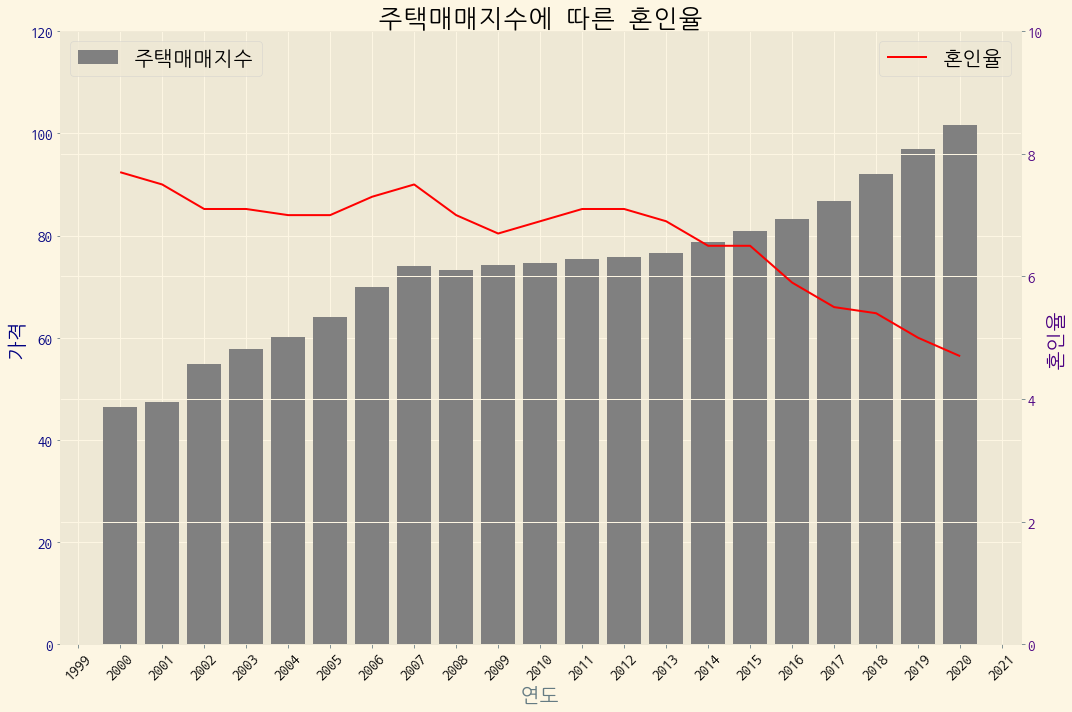

In [ ]:
fig = plt.figure(figsize=(15, 10))
fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()

ax1.set_title('주택매매지수에 따른 혼인율', fontsize=25)
ax1.set_xlabel('연도', fontsize=20)
ax1.set_ylabel('가격', fontsize=20, color = 'navy')
ax2.set_ylabel('혼인율', fontsize=20, color = 'indigo')

line1 = ax1.bar(jika.index, jika['서울'].values, color='gray' , label='주택매매지수')
line2 = ax2.plot(marriage.index, marriage['서울특별시'].values, color='red', label='혼인율')


ax1.xaxis.set_major_locator(MaxNLocator(25))
ax1.set_ylim(0,120,10)
ax2.set_ylim(0,10,5)
ax1.tick_params(axis='x', labelsize=15, labelcolor='black' , rotation=45)
ax1.tick_params(axis='y', labelsize=15, labelcolor='navy')
ax2.tick_params(axis='y', labelsize=15, labelcolor='indigo')



ax1.legend(loc = 'upper left', fontsize=20, ncol=4)
ax2.legend(loc = 'upper right', fontsize=20, ncol=4)

plt.tight_layout()
plt.grid(True)

plt.show()

#### 출생률 비교

<Figure size 1080x720 with 0 Axes>

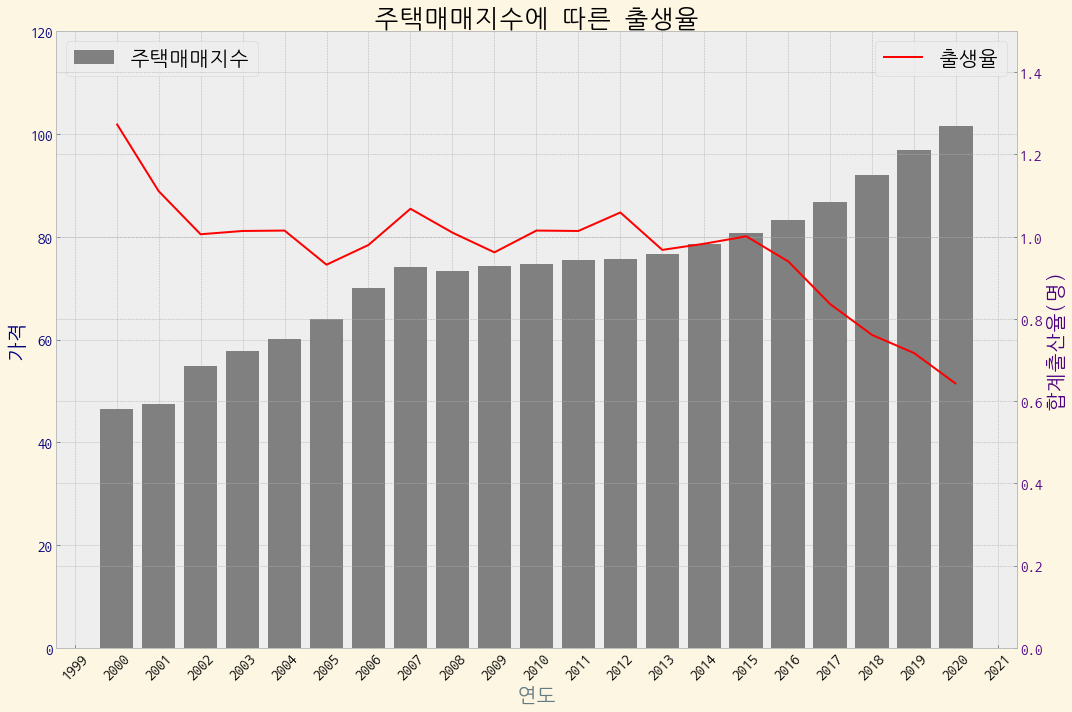

In [ ]:
fig = plt.figure(figsize=(15, 10))
fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()

ax1.set_title('주택매매지수에 따른 출생율', fontsize=25)
ax1.set_xlabel('연도', fontsize=20)
ax1.set_ylabel('가격', fontsize=20, color = 'navy')
ax2.set_ylabel('합계출산율(명)', fontsize=20, color = 'indigo')

line1 = ax1.bar(jika.index, jika['서울'].values, color='gray' , label='주택매매지수')
line2 = ax2.plot(birth.index, birth['서울특별시'].values, color='red', label='출생율')


ax1.xaxis.set_major_locator(MaxNLocator(25))
ax1.set_ylim(0,120,10)
ax2.set_ylim(0,1.5,0.1)
ax1.tick_params(axis='x', labelsize=15, labelcolor='black' , rotation=45)
ax1.tick_params(axis='y', labelsize=15, labelcolor='navy')
ax2.tick_params(axis='y', labelsize=15, labelcolor='indigo')

ax1.legend(loc = 'upper left', fontsize=20, ncol=4)
ax2.legend(loc = 'upper right', fontsize=20, ncol=4)

plt.tight_layout()
plt.grid(True)

plt.show()

#### 1인가구 비율 비교

<Figure size 1080x720 with 0 Axes>

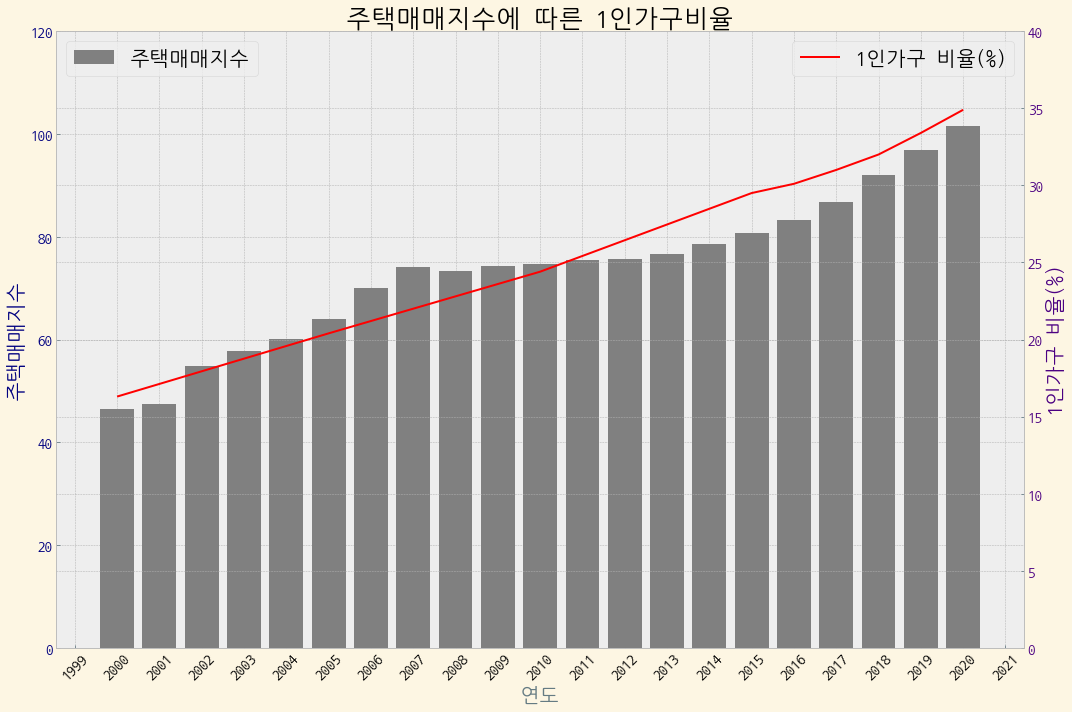

In [ ]:
fig = plt.figure(figsize=(15, 10))
fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()

ax1.set_title('주택매매지수에 따른 1인가구비율', fontsize=25)
ax1.set_xlabel('연도', fontsize=20)
ax1.set_ylabel('주택매매지수', fontsize=20, color = 'navy')
ax2.set_ylabel('1인가구 비율(%)', fontsize=20, color = 'indigo')

line1 = ax1.bar(jika.index, jika['서울'].values, color='gray' , label='주택매매지수')
line2 = ax2.plot(one_household.index, one_household['서울특별시'].values, color='red', label='1인가구 비율(%)')


ax1.xaxis.set_major_locator(MaxNLocator(25))
ax1.set_ylim(0,120,10)
ax2.set_ylim(0,40,5)
ax1.tick_params(axis='x', labelsize=15, labelcolor='black' , rotation=45)
ax1.tick_params(axis='y', labelsize=15, labelcolor='navy')
ax2.tick_params(axis='y', labelsize=15, labelcolor='indigo')

ax1.legend(loc = 'upper left', fontsize=20, ncol=4)
ax2.legend(loc = 'upper right', fontsize=20, ncol=4)

plt.tight_layout()
plt.grid(True)

plt.show()

- 결국 집값 상승으로 인한 혼인율과 출생율의 감소는 1인가구 비율 증가에 가속화를 촉진한다는 것을 알 수 있음.

In [ ]:
df_complex = pd.read_csv('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/발표 자료 데이터/전처리/인구출생혼인지수 복합.csv', index_col=0)
df_complex

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
전국 혼인,7.000,6.700,6.300,6.300,6.400,6.500,6.800,7.000,6.600,6.200,6.500,6.600,6.500,6.400,6.000,5.900,5.500,5.200,5.000,4.700,4.200
서울 혼인,7.700,7.500,7.100,7.100,7.000,7.000,7.300,7.500,7.000,6.700,6.900,7.100,7.100,6.900,6.500,6.500,5.900,5.500,5.400,5.000,4.700
전국 출생,1.480,1.309,1.178,1.191,1.164,1.085,1.132,1.259,1.192,1.149,1.226,1.244,1.297,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.837
서울 출생,1.275,1.111,1.006,1.014,1.015,0.932,0.980,1.068,1.010,0.962,1.015,1.014,1.059,0.968,0.983,1.001,0.940,0.836,0.761,0.717,0.642
전국 1인가구,15.500,NaN,NaN,NaN,NaN,20.000,NaN,NaN,NaN,NaN,23.900,NaN,NaN,NaN,NaN,27.200,27.900,28.600,29.300,30.200,31.700
서울 1인가구,16.300,NaN,NaN,NaN,NaN,20.400,NaN,NaN,NaN,NaN,24.400,NaN,NaN,NaN,NaN,29.500,30.100,31.000,32.000,33.400,34.900
서울 지가지수,46.514,47.399,54.888,57.755,60.113,64.059,69.933,74.047,73.306,74.329,74.722,75.444,75.729,76.642,78.683,80.798,83.201,86.791,92.097,96.966,101.624


In [ ]:
df_complex = df_complex.swapaxes(axis1=0,axis2=1)

In [ ]:
df_complex

,전국 혼인,서울 혼인,전국 출생,서울 출생,전국 1인가구,서울 1인가구,서울 지가지수
2000,7.0,7.7,1.480,1.275,15.5,16.3,46.514
2001,6.7,7.5,1.309,1.111,NaN,NaN,47.399
2002,6.3,7.1,1.178,1.006,NaN,NaN,54.888
2003,6.3,7.1,1.191,1.014,NaN,NaN,57.755
2004,6.4,7.0,1.164,1.015,NaN,NaN,60.113
2005,6.5,7.0,1.085,0.932,20.0,20.4,64.059
2006,6.8,7.3,1.132,0.980,NaN,NaN,69.933
2007,7.0,7.5,1.259,1.068,NaN,NaN,74.047
2008,6.6,7.0,1.192,1.010,NaN,NaN,73.306
2009,6.2,6.7,1.149,0.962,NaN,NaN,74.329


<Figure size 1080x360 with 0 Axes>

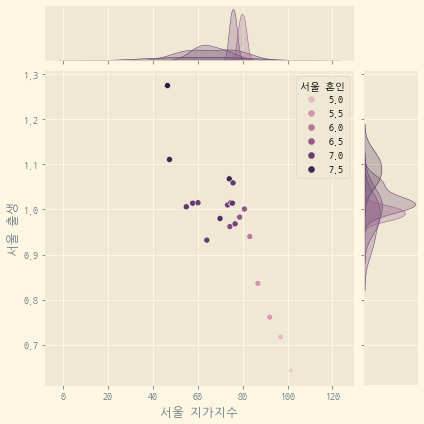

In [ ]:
plt.figure( figsize=(15,5) )
sns.jointplot(data=df_complex, x='서울 지가지수', y='서울 출생', hue='서울 혼인')

- 서울 지가가 높을수록 혼인률, 출생률은 떨어진다

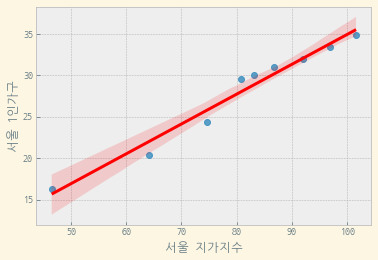

In [ ]:
sns.regplot(data=df_complex, x='서울 지가지수', y='서울 1인가구', line_kws={'color':'red'})

지가가 높고 혼인율이 낮으면 1인가구 비율이 높고, 지가가 낮고 혼인율이 높으면 1인가구 비율이 낮다
- 지가와 혼인율은 1인가구 증감에 영향을 끼침

In [ ]:
birthandmarraige = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/발표 자료 데이터/전처리/출생혼인 매매,전세.xlsx', index_col=0)
birthandmarraige_rent = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/발표 자료 데이터/전처리/출생혼인 월세.xlsx', index_col=0)

In [ ]:
birthandmarraige.head(1)

,전국 매매가,서울특별시 매매가,강북지역 매매가,도심권 매매가,종로구 매매가,중구 매매가,용산구 매매가,동북권 매매가,성동구 매매가,광진구 매매가,동대문구 매매가,중랑구 매매가,성북구 매매가,강북구 매매가,도봉구 매매가,노원구 매매가,서북권 매매가,은평구 매매가,서대문구 매매가,마포구 매매가,강남지역 매매가,서남권 매매가,양천구 매매가,강서구 매매가,구로구 매매가,금천구 매매가,영등포구 매매가,동작구 매매가,관악구 매매가,동남권 매매가,서초구 매매가,강남구 매매가,송파구 매매가,강동구 매매가,전국 전세가,서울특별시 전세가,강북지역 전세가,도심권 전세가,종로구 전세가,중구 전세가,...,금천구 혼인,영등포구 혼인,동작구 혼인,관악구 혼인,서초구 혼인,강남구 혼인,송파구 혼인,강동구 혼인,전국 출생,서울특별시 출생,종로구 출생,중구 출생,용산구 출생,성동구 출생,광진구 출생,동대문구 출생,중랑구 출생,성북구 출생,강북구 출생,도봉구 출생,노원구 출생,은평구 출생,서대문구 출생,마포구 출생,양천구 출생,강서구 출생,구로구 출생,금천구 출생,영등포구 출생,동작구 출생,관악구 출생,서초구 출생,강남구 출생,송파구 출생,강동구 출생,총거래량,다가구주택 거래량,다세대주택 거래량,연립주택 거래량,아파트 거래량
2012-01-01,264474,540954,405962,706316,501646,545130,852152,362309,475333,666091,377115,318378,376894,344750,319740,287444,428866,355486,371135,512887,649861,452515,582373,397588,351344,282328,541840,494561,393049,850021,972183,1050728,773923,503029,150775,267661,222123,321687,283573,302700,...,167,256,291,367,238,296,405,292,44984,8758,88,125,225,273,290,262,345,414,268,291,526,388,218,392,346,520,448,182,356,367,443,416,476,664,435,5256,142,1500,173,2959


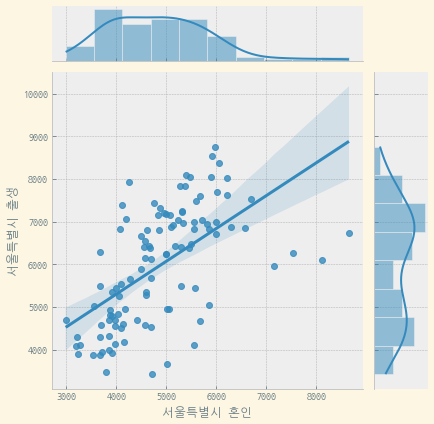

In [ ]:
sns.jointplot(data=birthandmarraige, x='서울특별시 혼인', y='서울특별시 출생', kind="reg")

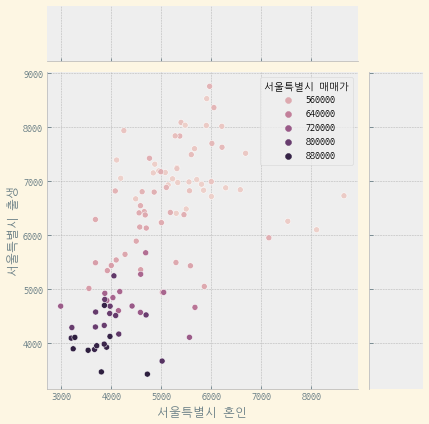

In [ ]:
sns.jointplot(data=birthandmarraige, x='서울특별시 혼인', y='서울특별시 출생', hue='서울특별시 매매가')

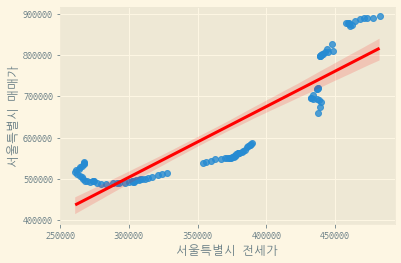

In [ ]:
sns.regplot(data=birthandmarraige, x='서울특별시 매매가', y='서울특별시 매매가', line_kws={'color':'red'})

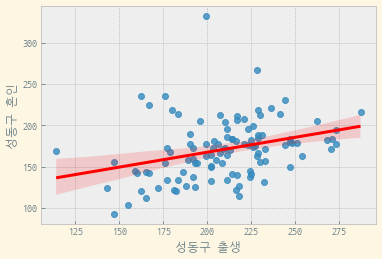

In [ ]:
sns.regplot(data=birthandmarraige, x='성동구 출생', y='성동구 혼인', line_kws={'color':'red'})

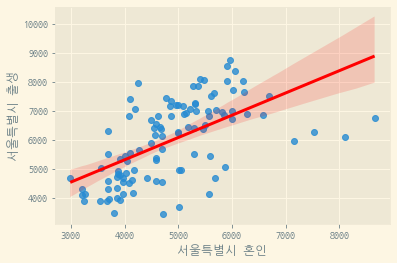

In [ ]:
sns.regplot(data=birthandmarraige, x='서울특별시 혼인', y='서울특별시 출생', line_kws={'color':'red'})

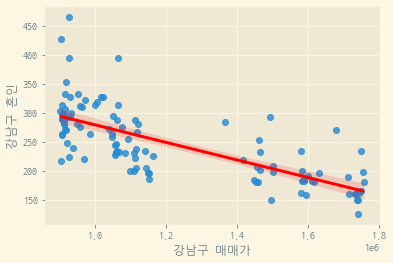

In [ ]:
sns.regplot(data=birthandmarraige, x='강남구 매매가', y='강남구 혼인', line_kws={'color':'red'})

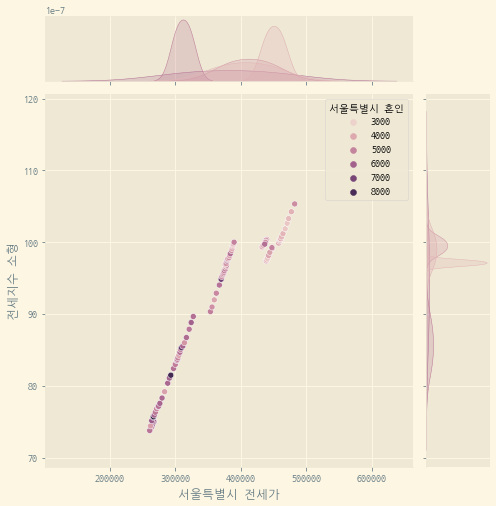

In [ ]:
 sns.jointplot(data=birthandmarraige, x="서울특별시 전세가", y="전세지수 소형", hue='서울특별시 혼인', height=7)

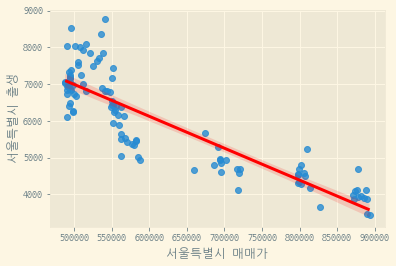

In [ ]:
sns.regplot(data=birthandmarraige, x='서울특별시 매매가', y='서울특별시 출생', line_kws={'color':'red'})

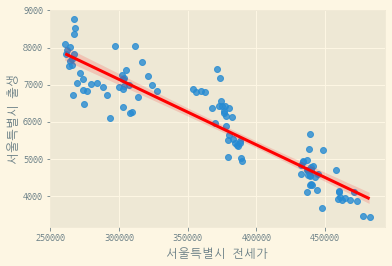

In [ ]:
sns.regplot(data=birthandmarraige, x='서울특별시 전세가', y='서울특별시 출생', line_kws={'color':'red'})

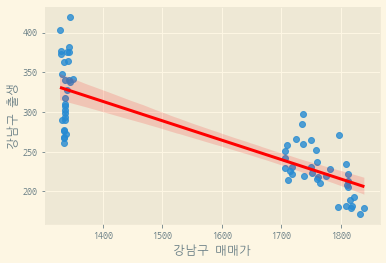

In [ ]:
sns.regplot(data=birthandmarraige_rent, x='강남구 매매가', y='강남구 출생', line_kws={'color':'red'})